In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Weight decay data

In [10]:
names = ['fwd_decay_inv', 'lrn_decay_inv', 'train_acc', 'test_acc', 'conv_0', 'linear_0', 'conv_1', 'linear_1', 'conv_2', 'linear_2', 'conv_3', 'linear_3', 'conv_4', 'linear_4', 'conv_5', 'linear_5', 'conv_6', 'linear_6', 'linear_out']
weight_df = pd.read_csv('res/weight_decay.csv', names=names, header=None)
layers_columns = weight_df.columns[4:]
weight_df

,fwd_decay_inv,lrn_decay_inv,train_acc,test_acc,conv_0,linear_0,conv_1,linear_1,conv_2,linear_2,conv_3,linear_3,conv_4,linear_4,conv_5,linear_5,conv_6,linear_6,linear_out
0,0,0,0.852804,0.766026,5688.113715,835.183936,7144.795410,950.491968,7887.730530,966.117798,5561.993273,878.763525,5378.557521,801.432886,4810.600397,576.066870,1183.956302,334.245215,316.003418
1,0,3000,0.846755,0.769732,5742.966725,827.262427,7129.517663,942.652881,7872.975433,954.182568,5567.786844,871.382886,5382.845701,794.661816,4862.707789,575.703711,1320.641800,347.649609,315.040039
2,0,1000,0.840465,0.774940,5787.896701,665.472607,6871.714840,723.930518,7653.150306,730.061548,5503.631393,708.495630,5414.638273,681.147656,4960.584709,549.473535,1730.669136,386.543555,343.745898
3,20000,0,0.846955,0.761919,5594.883681,834.661230,7042.084479,950.706494,7788.780958,969.936792,5541.470065,882.209668,5356.355707,803.463525,4803.296997,578.559497,1184.065735,339.957422,319.143262
4,20000,3000,0.847877,0.771234,5598.063368,831.214990,7032.622192,941.885010,7771.801831,958.532251,5545.444606,872.598779,5357.925380,795.373779,4854.867329,577.918286,1320.083526,350.494336,318.678418
5,20000,1000,0.838622,0.775140,5630.077836,665.315942,6769.678107,725.326807,7565.425817,730.924390,5493.036527,711.556519,5401.907067,682.779468,4957.065890,550.420142,1742.854498,390.880859,348.398047
6,15000,0,0.845713,0.772837,5415.342882,836.529688,6892.562486,952.396899,7631.879903,971.567993,5483.292753,881.618774,5316.134651,808.831519,4777.982217,582.303638,1207.760824,349.295117,325.723340
7,15000,3000,0.842107,0.769531,5403.108507,828.690796,6885.978214,944.479297,7613.559891,960.086768,5483.975931,874.833887,5317.169946,799.681958,4829.181060,582.195093,1321.812584,352.413672,320.935547
8,15000,1000,0.835296,0.775441,5411.358218,666.556372,6614.743452,725.566870,7405.070663,728.359424,5432.998030,710.341113,5368.426325,682.909448,4930.105882,551.844629,1740.276879,390.630273,347.240527
9,10000,0,0.833654,0.764022,5052.371817,833.917432,6466.405677,947.902661,7158.076658,974.081860,5290.647113,888.609351,5139.572873,814.172949,4675.972101,591.926563,1182.296542,355.157812,327.213477


In [11]:
selected_block = 5
block_columns = [f'conv_{selected_block}', f'linear_{selected_block}']
variables = ['fwd_decay_inv', 'lrn_decay_inv']
cols = variables + block_columns

In [12]:
no_decay_placeholder = 25_000
weight_df['fwd_decay_inv'] = weight_df['fwd_decay_inv'].replace(0, no_decay_placeholder)
weight_df['lrn_decay_inv'] = weight_df['lrn_decay_inv'].replace(0, no_decay_placeholder)
weight_x_labels = weight_df['fwd_decay_inv'].replace(no_decay_placeholder, 'No\ndecay').unique()
weight_y_labels = [no_decay_placeholder, 3000, 1000]

## Dim learning layers data

In [13]:
dim_df = pd.read_csv('res/learning_dim.csv', names=['learning_dim', 'train_acc', 'test_acc'], header=None)
dim_df[["train_acc", "test_acc"]] = dim_df[["train_acc", "test_acc"]] * 100
dim_df

,learning_dim,train_acc,test_acc
0,512,68.275848,69.461138
1,1024,80.367718,77.473958
2,2048,96.462868,81.650641
3,4096,99.443822,84.064503
4,8192,99.707907,82.101362


## Plot

In [14]:
params = {
   'font.size': 26,
   'axes.linewidth': 1.25,
   'axes.labelsize': 26,
   'legend.fontsize': 22,
   'xtick.labelsize': 26,
   'ytick.labelsize': 26,
}
plt.rcParams.update(params)

In [15]:
# Weight decay
weight_title = 'Effects of weight decay on the convolutional layer'
weight_x_label = '$\eta_{inv}$ forward'
weight_y_label = 'Mean absolute value'
weight_legend_labels = ['$\eta_{inv}^{lr}$ = ' + str(value) for value in weight_y_labels]
weight_legend_labels[0] = 'No decay'

In [16]:
from palettable.colorbrewer.qualitative import Set2_3
weight_colors = Set2_3.mpl_colors

In [17]:
# Learning dimension
dim_title = 'Effect of $d^{lr}$ on the accuracy'
dim_x_label = '$d^{lr}$'
dim_y_label = 'Accuracy (%)'
dim_legend_labels = ['Train accuracy', 'Test accuracy']

In [18]:
from palettable.colorbrewer.qualitative import Set2_3
dim_colors = Set2_3.mpl_colors

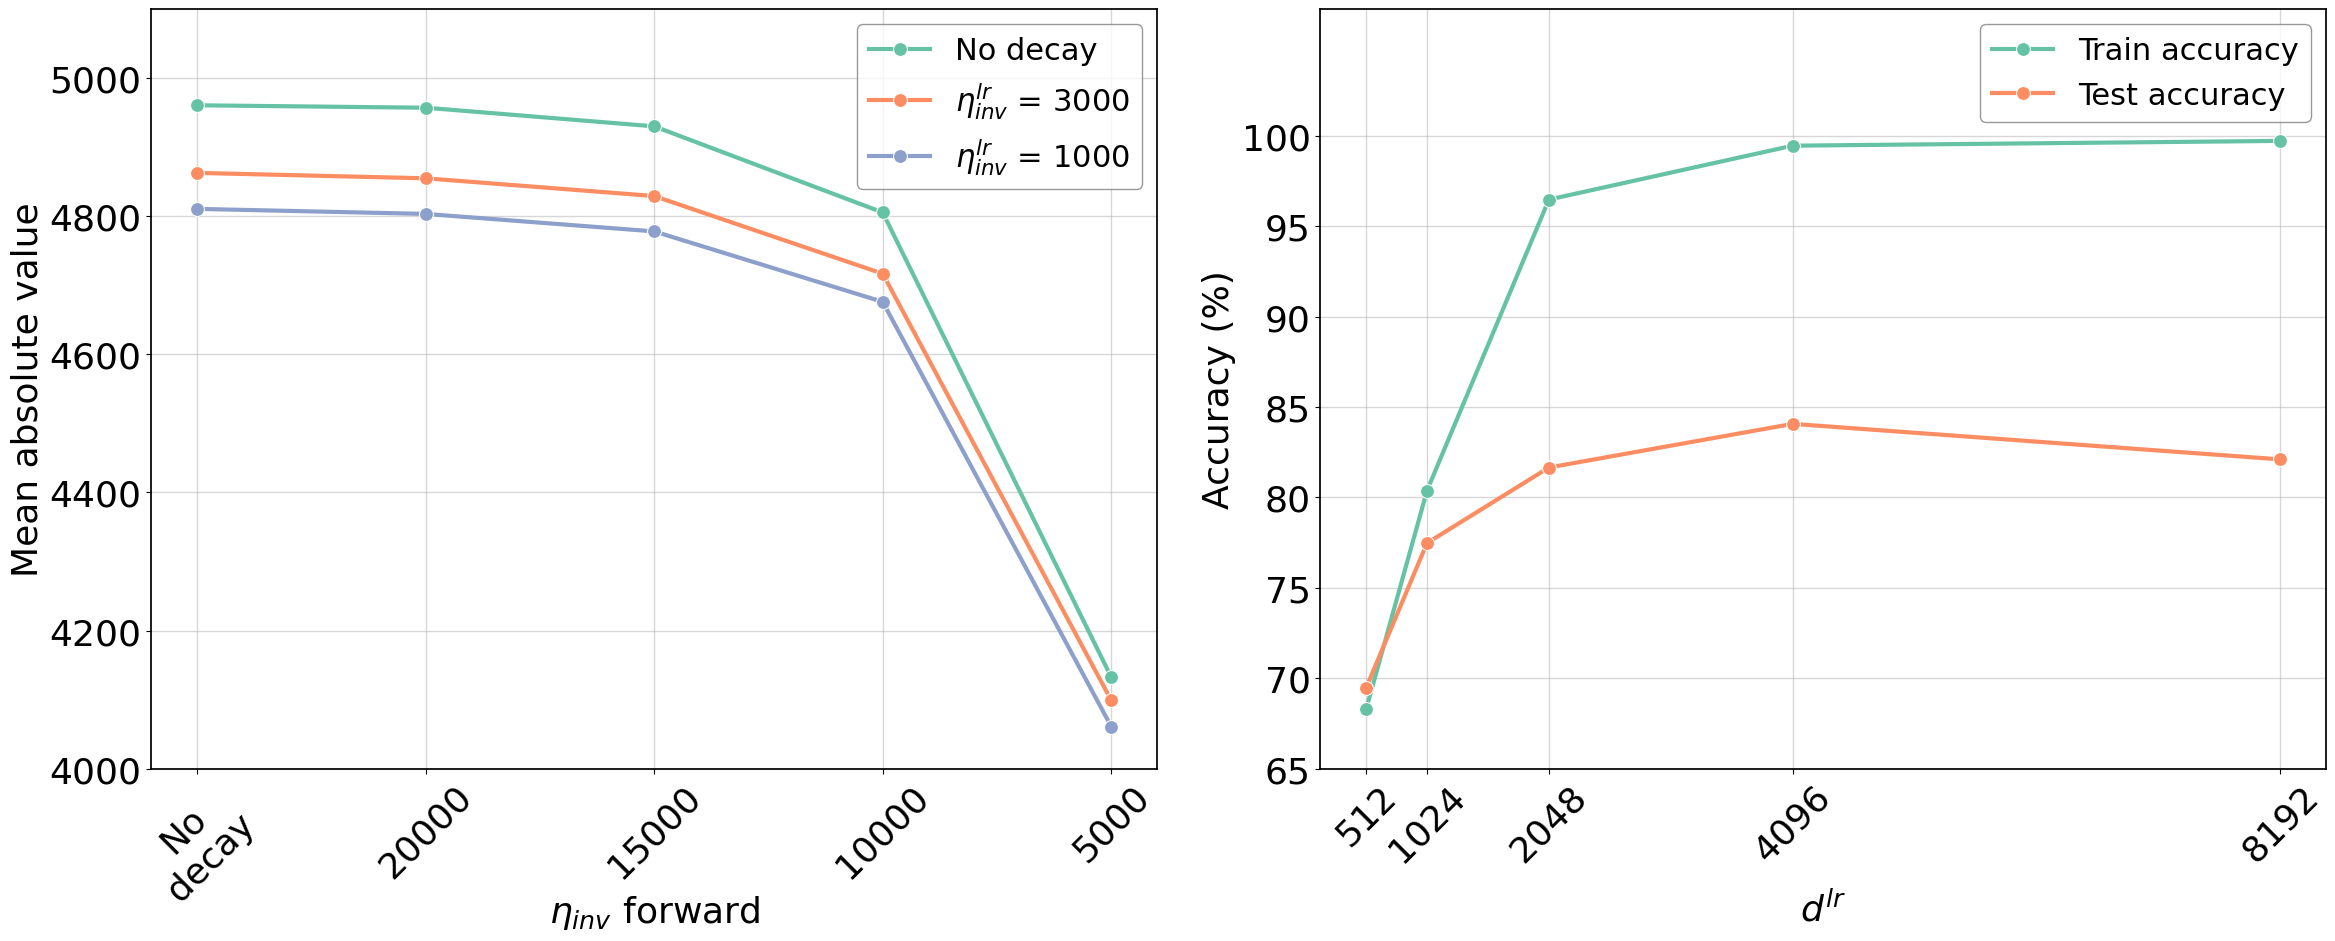

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

# Weight decay plot
axs[0].set_xlabel(weight_x_label, labelpad=-10)
axs[0].set_ylabel(weight_y_label)

sns.lineplot(
    data=weight_df, x='fwd_decay_inv',y=block_columns[0],
    hue='lrn_decay_inv', ax=axs[0], marker='o', errorbar=None, 
    linewidth=3, markersize=10, palette=weight_colors
)

axs[0].invert_xaxis() 
axs[0].set_xticks(weight_df['fwd_decay_inv'].unique(), labels=weight_x_labels)
axs[0].set_ylim(4000, 5100)
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].tick_params(axis='x')
axs[0].tick_params(axis='y')  

legend = axs[0].legend(weight_legend_labels, loc='upper right')
frame = legend.get_frame()
frame.set_edgecolor('0.5')
axs[0].grid(linewidth=1, alpha=0.5, axis='both')

# Dimension plot
kwargs = dict(ax=axs[1], marker='o', linestyle='-', errorbar=None, linewidth=3, markersize=10)
sns.lineplot(data=dim_df, x='learning_dim', y='train_acc', **kwargs, color=dim_colors[0])
sns.lineplot(data=dim_df, x='learning_dim', y='test_acc', **kwargs, color=dim_colors[1])
 
axs[1].set_xticks(dim_df['learning_dim'].unique())
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].set_xlabel(dim_x_label, labelpad=16)
axs[1].set_yticks(range(0, 101, 5), labels=range(0, 101, 5))
axs[1].set_ylim(65, 107)
axs[1].set_ylabel(dim_y_label)

# ax.set_title(title, fontsize=25)
legend = axs[1].legend(dim_legend_labels, loc='upper right')
frame = legend.get_frame()
frame.set_edgecolor('0.5')
axs[1].grid(linewidth=1, alpha=0.5, axis='both')

plt.tight_layout()
plt.savefig('out/weight_and_dim_effect.png')
plt.savefig('out/weight_and_dim_effect.pdf')